<a href="https://colab.research.google.com/github/a-forty-two/zee_9_may_22/blob/main/CV_and_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


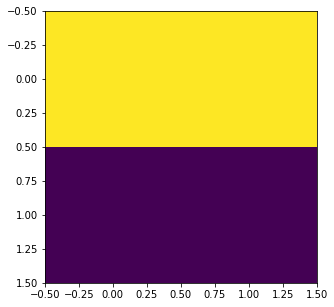

In [2]:
i1 = np.array([np.array([200,200]),np.array([0,0])]) # HORIZONTAL
i2 = np.array([np.array([200,0]),np.array([200,0])]) # vertical
i3 = np.array([np.array([200,0]),np.array([0,200])]) #diagonal
plt.figure(figsize=(5,5))
plt.imshow(i1)

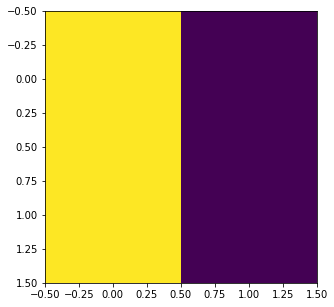

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(i2)

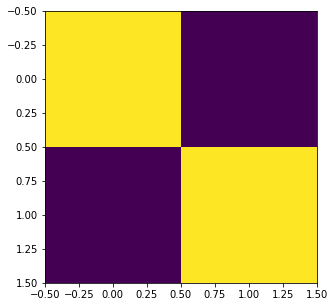

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(i3)

In [5]:
kernels_h =np.array([np.array([2,2]),np.array([-2,-2])])
kernels_v=np.array([np.array([2,-2]),np.array([2,-2])])
kernels_d=np.array([np.array([2,-2]),np.array([-2,2])])
#filters

In [6]:
def applyFilter(img, kernel):
  result = np.sum(np.multiply(img, kernel))
  return result
isFound = lambda val: ' detected' if val>0 else ' not detected'


In [7]:
kernels = [kernels_h, kernels_v, kernels_d]
images = [i1, i2, i3]

for count, img in enumerate(images):
  print('Image number ' + str(count+1))
  for countdracula, kernel in enumerate(kernels):
    print('Kernel number ' + str(countdracula+1))
    print(isFound( applyFilter(img, kernel) ))


    
  

Image number 1
Kernel number 1
 detected
Kernel number 2
 not detected
Kernel number 3
 not detected
Image number 2
Kernel number 1
 not detected
Kernel number 2
 detected
Kernel number 3
 not detected
Image number 3
Kernel number 1
 not detected
Kernel number 2
 not detected
Kernel number 3
 detected


1234.png  sample_data


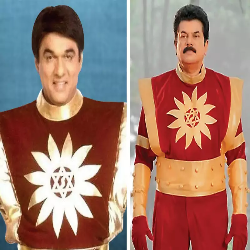

In [8]:
import cv2
from google.colab.patches import cv2_imshow
!ls
data = cv2.imread('1234.png')
data = cv2.resize(data, (250,250))
cv2_imshow(data)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
# VGG16 is an OBJECT DETECTION and IMAGE CLASSIFICATION algorithm for colored images!

In [23]:
model = VGG16()
# ML-> we multiplied, inputs to weights
# in CV, input=image, weights = kernel/filter 
# y = mx+c => y = image * kernel + bias 
kernels, biases = model.layers[1].get_weights()

In [24]:
biases

array([ 0.73429835,  0.09340367,  0.06775674,  0.8862966 ,  0.25994542,
        0.66426694, -0.01582893,  0.3249065 ,  0.68600726,  0.06247932,
        0.58156496,  0.2361475 ,  0.69694996,  0.19451167,  0.4858922 ,
        0.44571847,  0.5113422 ,  0.208576  ,  0.57557714,  0.33199573,
        0.4997983 ,  0.7117759 ,  0.30284074,  0.7082712 ,  0.04548979,
        0.7446502 ,  0.29845494,  0.48211655,  0.81658626,  0.62603897,
        0.3768093 ,  2.064037  ,  0.77311045,  0.3459577 ,  0.6130958 ,
        0.65459156,  0.39045632,  0.50869167,  0.2625384 ,  0.23669638,
        0.07971057,  1.1179353 ,  0.26129362,  0.8697589 ,  0.21543622,
        0.78007823,  0.37015367,  0.47993386,  0.4313978 ,  0.5084194 ,
        0.23049663,  0.7636527 ,  0.35419866,  0.45794216,  0.4662595 ,
        0.09850298,  0.3803252 ,  0.66880196,  0.4015123 ,  0.90510356,
        0.43166816,  1.302014  ,  0.5306885 ,  0.48993504], dtype=float32)

In [26]:
filtermin, filtermax = kernels.min(), kernels.max()
normfilters = (kernels- filtermin) / (filtermax -  filtermin)  # (x-min)/(max-min)


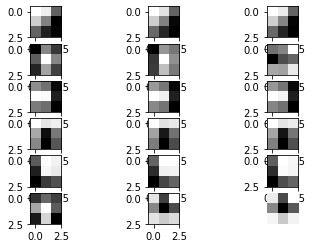

In [13]:

n_filters_rows, ix = 6, 1
n_filters_col = 3
# 18 filters-> 6 X 3
for i in range(n_filters_rows):
  kernel = kernels[:,:,:,i]
  for j in range(n_filters_col):
    ax = plt.subplot(n_filters_rows, n_filters_col, ix)
    plt.imshow(kernel[:,:,j], cmap='gray')
    ix = ix+1

plt.axis('off')
plt.show()

In [14]:
kernels.shape

(3, 3, 3, 64)

In [15]:
# let's find out how many filters does this VGG network has

# FILTERS-> CONVOLUTIONAL LAYER

for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  kernels, biases = layer.get_weights()
  print(layer.name)
  print(kernels.shape)

block1_conv1
(3, 3, 3, 64)
block1_conv2
(3, 3, 64, 64)
block2_conv1
(3, 3, 64, 128)
block2_conv2
(3, 3, 128, 128)
block3_conv1
(3, 3, 128, 256)
block3_conv2
(3, 3, 256, 256)
block3_conv3
(3, 3, 256, 256)
block4_conv1
(3, 3, 256, 512)
block4_conv2
(3, 3, 512, 512)
block4_conv3
(3, 3, 512, 512)
block5_conv1
(3, 3, 512, 512)
block5_conv2
(3, 3, 512, 512)
block5_conv3
(3, 3, 512, 512)


In [16]:
# transfer learning -> chopping a model and combining with other layers 
from tensorflow.keras import Model
mymodel = Model(inputs= model.inputs, outputs= model.layers[1].output)


In [17]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('1234.png', target_size=(224,224))
img = img_to_array(img)
img.shape

(224, 224, 3)

In [18]:
# individual kernel is called a filter
# filter map is applying filters to images to get the result 

from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

image = expand_dims(img, axis=0) # add one dimension at last
# in tensorflow-> we follow the dimensions towards right or CHANNEL_LAST (255,255,3)
# in theano-> CHANNEL_FIRST-> (3,255,255)
image = preprocess_input(image)

featureMaps = mymodel.predict(image)

In [19]:
featureMaps.shape

(1, 224, 224, 64)

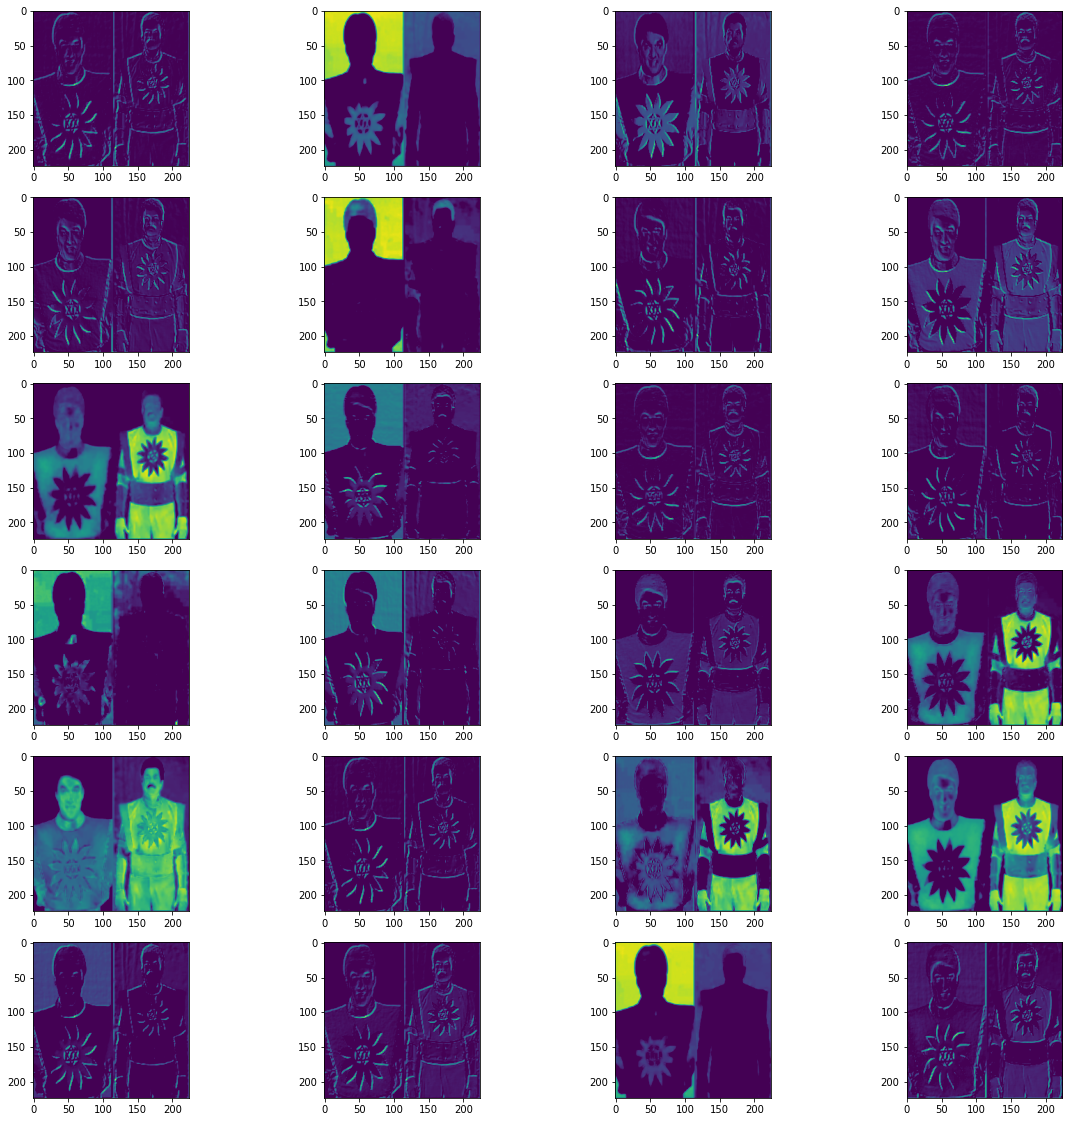

In [20]:
# 6X4
ix = 1
plt.figure(figsize=(20,20))
for x in range(24):
  ax = plt.subplot(6,4, ix )
  plt.imshow(featureMaps[0,:,:,ix-1])
  ix = ix +1
plt.show()

In [21]:
!ls

1234.png  sample_data


In [ ]:
# will explain later, please don't uncomment :) 
#i1 = cv2.imread('i3.png')
#i2 = cv2.imread('i4.png')
#newimg = cv2.bitwise_or(i1, i2, mask=None)
#newimg2 = cv2.bitwise_xor(x1, i2, mask=None)
#newimg3 = cv2.bitwise_not(x1, mask=None)
#cv2_imshow(i1)
#cv2_imshow(i2)
#cv2_imshow(newimg)
#cv2_imshow(newimg2)
#cv2_imshow(newimg3)